# Install the necessary libraries (1 mark)

In [4]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import warnings
warnings.simplefilter('ignore')

In [5]:
import numpy as np

In [6]:
import pandas as pd

from sklearn.model_selection import train_test_split

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Import data 2C_weka.csv for 2 Class Classifcation. (1 mark)

In [173]:
df2 = pd.read_csv('2Classdata.csv')

In [174]:
df2.sample(10)

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
274         43.191915             9.976664              28.938149   
138         72.054034            24.700737              79.874016   
80          77.106571            30.469994              69.480628   
257         50.160078            -2.970024              42.000000   
287         33.041688            -0.324678              19.071075   
90          81.656032            28.748869              58.232821   
264         54.503685             6.819910              47.000000   
306         53.936748            20.721496              29.220534   
197         58.828379            37.577873             125.742385   
89          71.186811            23.896201              43.696665   

     sacral_slope  pelvic_radius  degree_spondylolisthesis     class  
274     33.215251     123.467400                  1.741018    Normal  
138     47.353297     107.172358                 56.426159  Abnormal  
80      46.636577     112.151600                 70.759083  Abnormal  
257     53.130102     131.802491                 -8.290203    Normal  
287     33.366366     120.388611                  9.354365    Normal  
90      52.907163     114.769856                 30.609148  Abnormal  
264     47.683775     111.791172                 -4.406769    Normal  
306     33.215251     114.365845                 -0.421010    Normal  
197     21.250506     135.629418                117.314683  Abnormal  
89      47.290610     119.864938                 27.283985  Abnormal

# Explore the data set.Get necessary information about the data. (4 marks)

In [175]:
# get the shape of the data 
df2.shape

(310, 7)

In [176]:
#check the type of data 
df2.dtypes
#the data is all numerical with one column which is to be predicted being categorical 

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [177]:
#check if any column has any null value 
df2.isnull().any()

pelvic_incidence            False
pelvic_tilt numeric         False
lumbar_lordosis_angle       False
sacral_slope                False
pelvic_radius               False
degree_spondylolisthesis    False
class                       False
dtype: bool

In [178]:
df2.describe()

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
count        310.000000           310.000000             310.000000   
mean          60.496653            17.542822              51.930930   
std           17.236520            10.008330              18.554064   
min           26.147921            -6.554948              14.000000   
25%           46.430294            10.667069              37.000000   
50%           58.691038            16.357689              49.562398   
75%           72.877696            22.120395              63.000000   
max          129.834041            49.431864             125.742385   

       sacral_slope  pelvic_radius  degree_spondylolisthesis  
count    310.000000     310.000000                310.000000  
mean      42.953831     117.920655                 26.296694  
std       13.423102      13.317377                 37.559027  
min       13.366931      70.082575                -11.058179  
25%       33.347122     110.709196                  1.603727  
50%       42.404912     118.268178                 11.767934  
75%       52.695888     125.467674                 41.287352  
max      121.429566     163.071041                418.543082

In [179]:
#try to get correlation between values
df2.corr()

pelvic_incidence  pelvic_tilt numeric  \
pelvic_incidence                  1.000000             0.629199   
pelvic_tilt numeric               0.629199             1.000000   
lumbar_lordosis_angle             0.717282             0.432764   
sacral_slope                      0.814960             0.062345   
pelvic_radius                    -0.247467             0.032668   
degree_spondylolisthesis          0.638743             0.397862   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.717282      0.814960      -0.247467   
pelvic_tilt numeric                    0.432764      0.062345       0.032668   
lumbar_lordosis_angle                  1.000000      0.598387      -0.080344   
sacral_slope                           0.598387      1.000000      -0.342128   
pelvic_radius                         -0.080344     -0.342128       1.000000   
degree_spondylolisthesis               0.533667      0.523557      -0.026065   

                          degree_spondylolisthesis  
pelvic_incidence                          0.638743  
pelvic_tilt numeric                       0.397862  
lumbar_lordosis_angle                     0.533667  
sacral_slope                              0.523557  
pelvic_radius                            -0.026065  
degree_spondylolisthesis                  1.000000

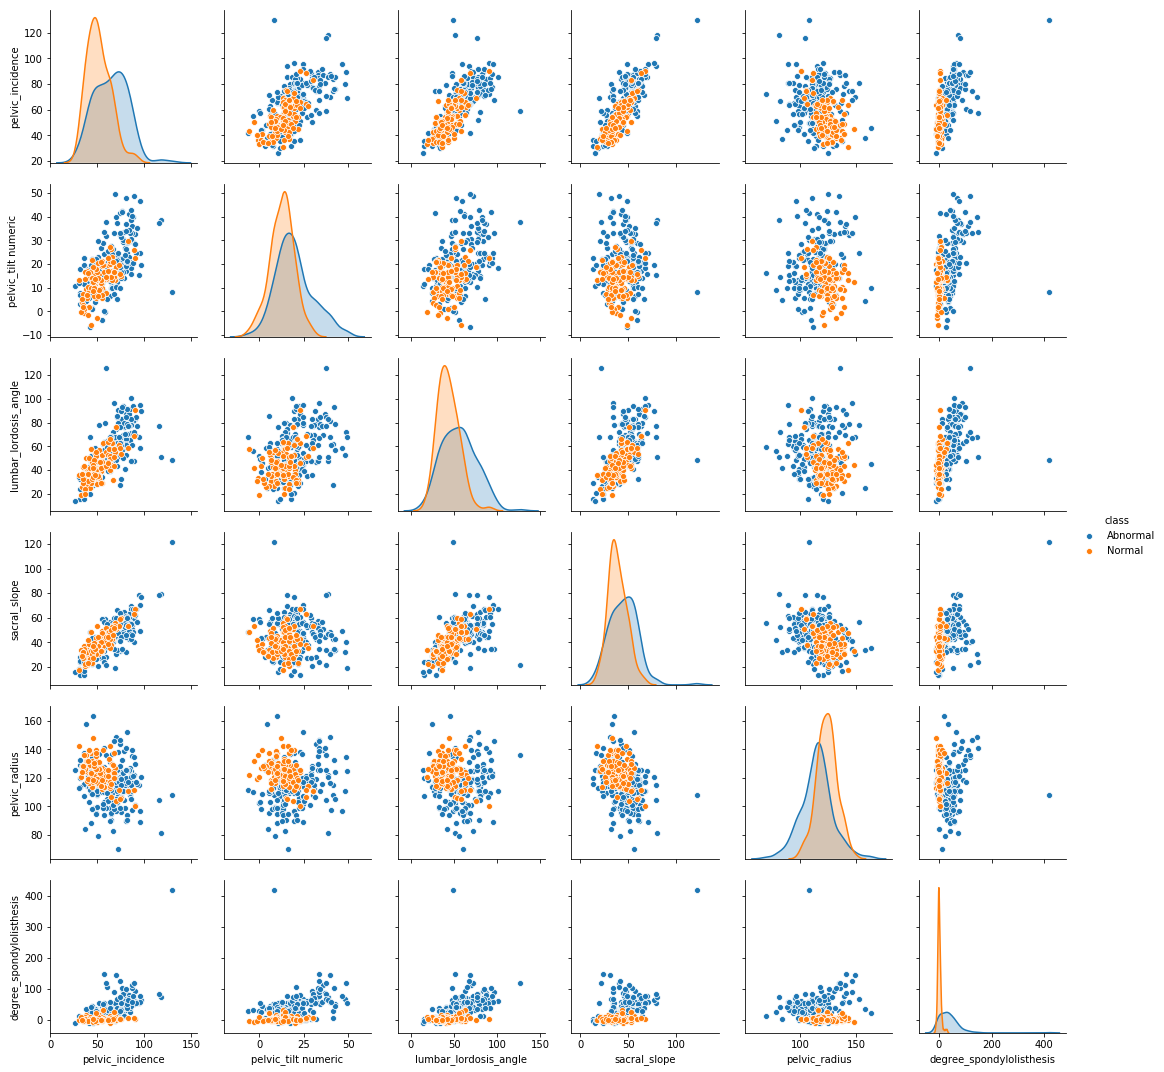

In [180]:
sns.pairplot(df2,hue = 'class')

In [181]:
#according to the figure pelvic_incidence and degree_spondylolisthesis are most important features of the data.

#degree_spondylolisthesis clearly seperates the2 classes

# Encode the Class variable to integer. (2 marks)

In [182]:
df2['class']= df2['class'].astype('category')

In [183]:
df2['class']=df2['class'].cat.codes

In [184]:
df2.head(5)

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027818            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  class  
0      98.672917                 -0.254400      0  
1     114.405425                  4.564259      0  
2     105.985135                 -3.530317      0  
3     101.868495                 11.211523      0  
4     108.168725                  7.918501      0

# Create the X(Feature-set) and Y(Target-set) sets for your Data. (2 marks)

In [185]:
#drop the first column from the data frame. This is Id column is not used in modeling

df2.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                          int8
dtype: object

In [186]:
df2_feature = df2.drop(labels='class', axis=1)

In [187]:
df2_feature.head(2)

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027818            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   

   pelvic_radius  degree_spondylolisthesis  
0      98.672917                 -0.254400  
1     114.405425                  4.564259

In [188]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

df2_feature_z = df2_feature.apply(zscore)  # convert all attributes to Z scale 

In [189]:
df2_feature_z.head(2)

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0          0.147086             0.501369              -0.665177     -0.184950   
1         -1.245864            -0.748769              -1.453001     -1.041521   

   pelvic_radius  degree_spondylolisthesis  
0      -1.447647                 -0.708059  
1      -0.264385                 -0.579556

In [190]:
y = df2['class']
x = df2_feature

# Split the dat as train and test with a ratio of 70:30. (2 marks)

In [191]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=4)


# Normalize your Data (X) to get values between 0 to 1. (2 marks)

In [192]:
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

# Build the KNN model using Train Dataset and predict the class on test dataset. (2 marks)

In [193]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(scaledX_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

# Calculate the performance score of of your classification on test dataset. (2 marks)

In [194]:
print("Testing Accuracy with 13 neighbour")
print(knn.score(scaledX_test,y_test))
print(knn.score(scaledX_train,y_train))

Testing Accuracy with 13 neighbour
0.8494623655913979
0.847926267281106


# What is the best K value for your classifcation? Find at which k value you get the best score. (2 marks)

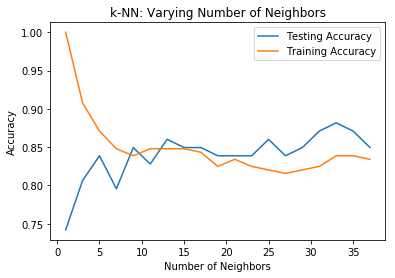

In [196]:
from matplotlib import pyplot as plt
neighbors = [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19,21,23,25,27,29,31,33,35,37]
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
y = df2['class']
x = df2_feature
for i, k in enumerate(neighbors):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=4)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    pre = knn.predict
    train_accuracy_plot[i] = knn.score(scaledX_train,y_train)
    test_accuracy_plot[i] = knn.score(scaledX_test,y_test) 

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [197]:
#The best value of K is - 15

# 3C_weka

In [8]:
#Q1. import libraries are already imported

In [9]:
#Q2. - Import data 3C_weka.csv for 2 Class Classifcation. (1 mark)

In [10]:
df3 = pd.read_csv('3Classdata.csv')

In [11]:
df3.sample(10)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
232         43.117951    13.815744              40.347388     29.302207   
142         85.290173    18.278890             100.744220     67.011283   
22          63.073611    24.413803              54.000000     38.659808   
137         83.396606    34.310989              78.423293     49.085617   
83          81.104100    24.794168              77.887020     56.309932   
144         60.044177    14.309656              58.038865     45.734521   
141         89.504947    48.903653              72.003423     40.601295   
270         51.311771     8.875541              57.000000     42.436230   
62          44.529051     9.433234              52.000000     35.095817   
226         63.959522    16.060945              63.123736     47.898577   

     pelvic_radius  degree_spondylolisthesis              class  
232     128.517722                  0.970926             Normal  
142     110.660700                 58.884948  Spondylolisthesis  
22      106.424329                 15.779697             Hernia  
137     110.466516                 49.672096  Spondylolisthesis  
83      151.839857                 65.214616  Spondylolisthesis  
144     105.131664                 30.409133  Spondylolisthesis  
141     134.634291                118.353370  Spondylolisthesis  
270     126.472258                 -2.144044             Normal  
62      134.711772                 29.106575  Spondylolisthesis  
226     142.360125                  6.298971             Normal

In [12]:
#Q3:Explore the data set.Get necessary information about the data. (4 marks)

In [13]:
#shape of data 
df3.shape

(310, 7)

In [14]:
df3.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [15]:
df3.isnull().any()

pelvic_incidence            False
pelvic_tilt                 False
lumbar_lordosis_angle       False
sacral_slope                False
pelvic_radius               False
degree_spondylolisthesis    False
class                       False
dtype: bool

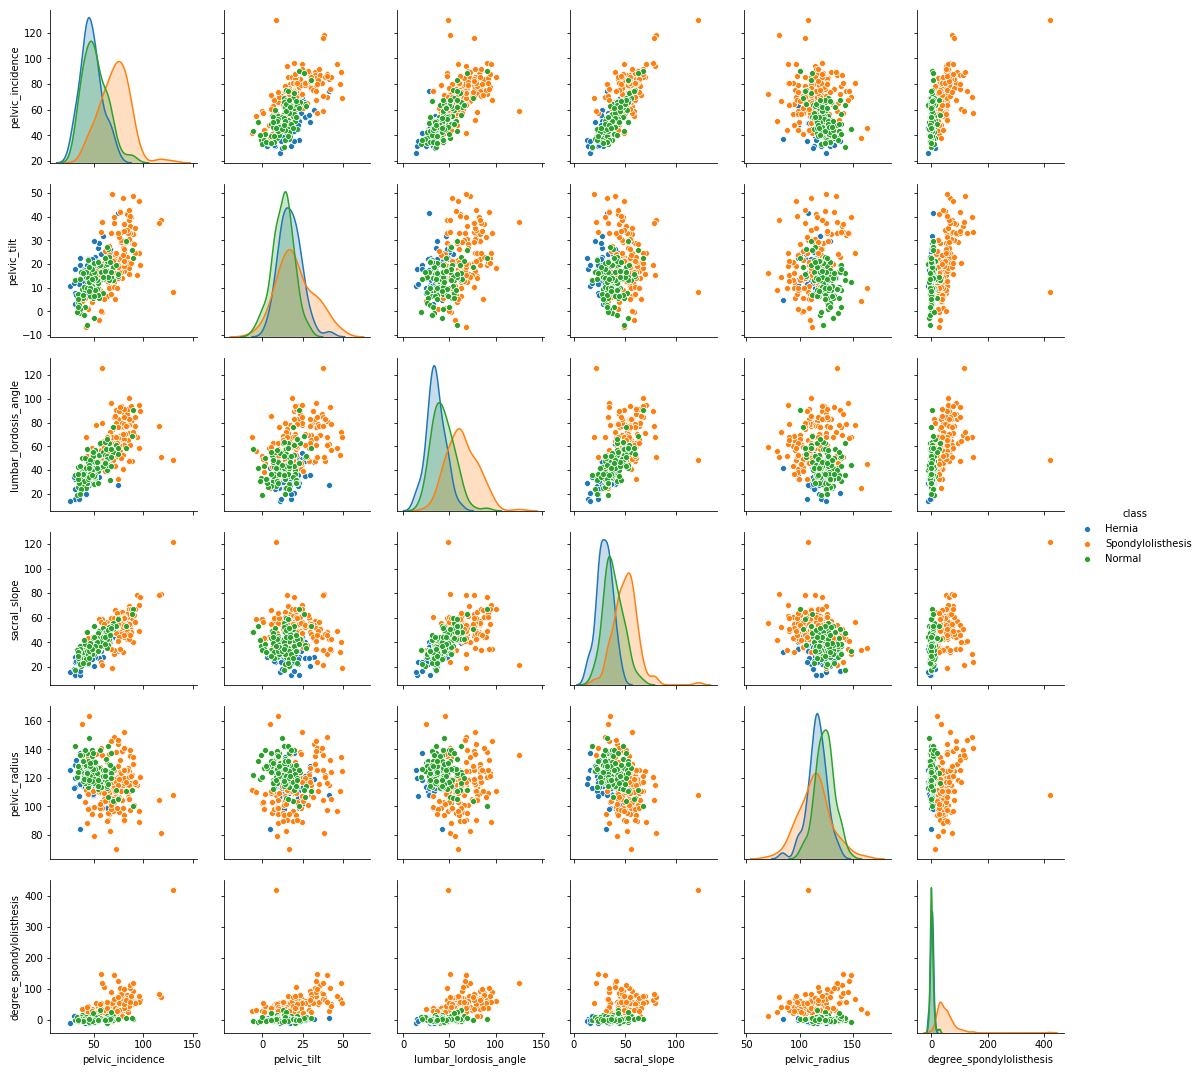

In [16]:
sns.pairplot(df3,hue='class')

In [17]:
#Q4:Encode the Class variable to integer. (2 marks)

In [18]:
df3['class']= df3['class'].astype('category') 
df3['class']=df3['class'].cat.codes

In [19]:
df3.sample(4)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
261         74.976021    14.921705              53.730072     60.054317   
126         70.676898    21.704402              59.181161     48.972496   
62          44.529051     9.433234              52.000000     35.095817   
135         77.121344    30.349874              77.481083     46.771470   

     pelvic_radius  degree_spondylolisthesis  class  
261     105.645400                  1.594748      1  
126     103.008355                 27.810148      2  
62      134.711772                 29.106575      2  
135     110.611148                 82.093607      2

In [20]:
#Q5:Create the X(Feature-set) and Y(Target-set) sets for your Data. (2 marks)

In [21]:
df3_feature = df3.drop(labels='class', axis=1)

In [22]:
y = df3['class']
x = df3_feature

In [23]:
#Q6:Normalize your Data (X) to get values between 0 to 1. (2 marks)

In [24]:
from sklearn import preprocessing
normalized_X = preprocessing.normalize(x)

In [25]:
#Split the dat as train and test with a ratio of 70:30. (2 marks)

In [26]:
 X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.30,random_state=4)

In [27]:
#Q:Build the KNN model using Train Dataset and predict the class on test dataset. (2 marks)

In [28]:

sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=42)
knn.fit(scaledX_train,y_train)
pre = knn.predict
pre

<bound method KNeighborsClassifier.predict of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=42, p=2,
           weights='uniform')>

In [29]:
print("Testing Accuracy with 42 neighbour")
print(knn.score(scaledX_test,y_test))
print(knn.score(scaledX_train,y_train))

Testing Accuracy with 42 neighbour
0.8172043010752689
0.7419354838709677


0.7956989247311828
0.7634408602150538
0.7634408602150538
0.7634408602150538
0.7634408602150538
0.7849462365591398
0.7741935483870968
0.8064516129032258
0.7956989247311828
0.7956989247311828
0.7956989247311828
0.8064516129032258
0.8064516129032258
0.8064516129032258
0.7956989247311828
0.7956989247311828
0.7849462365591398
0.7956989247311828
0.8064516129032258
0.7849462365591398
0.8172043010752689
0.8064516129032258
0.8064516129032258
0.8172043010752689
0.8172043010752689


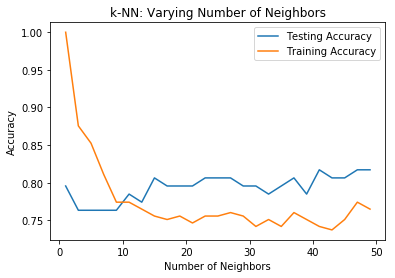

In [36]:
from matplotlib import pyplot as plt
neighbors = [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49]
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
y = df3['class']
x = df3_feature
#normalize the data 
x= preprocessing.normalize(x)
for i, k in enumerate(neighbors):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=4)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    pre = knn.predict
    train_accuracy_plot[i] = knn.score(scaledX_train,y_train)
    test_accuracy_plot[i] = knn.score(scaledX_test,y_test) 
    print( knn.score(scaledX_test,y_test))

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [37]:
#The best value of k is 42.